## Lead Scoring Case Study - Rajat Patil & Todd Ryman  

**Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.** 

 

**The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.**

 

**Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.**

**X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Importing libaries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## read in the dataset and check the shape
df = pd.read_csv("leads.csv")
df.shape

(9240, 37)

In [4]:
## print the first 10 rows of the dataset to have a quick view of the data
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [5]:
# Converting all the text to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [6]:
# number of columns contain the value select which means no value was selected and is the equivalant of null
# changing select to a null value
df = df.replace("select",np.nan)

In [7]:
##checking dataset for null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# checking the percentage of missing data for each column
pct_null= round(100*df.isnull().sum()  / len(df), 2)   
print(pct_null)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Dropping columnns with null percentage over 30%
high_null = pct_null[pct_null > 30].index
df.drop(high_null, axis=1, inplace=True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,student,better career prospects,no,no,no,no,no,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified


In [10]:
#checking id Lead Number has a duplicate
boolean = df["Lead Number"].duplicated().any()
print(boolean, end='\n\n')

False



In [11]:
#check for duplicates
boolean = df["Prospect ID"].duplicated().any()
print(boolean, end='\n\n')

False



In [12]:
# Dropping Prospect ID as it is unique ID numbers and we already have Lead number as a unique ID. 
# Dropping I agree to pay the amount through cheque becasue we are only concern with if they convert not how they pay
df.drop(["Prospect ID", "I agree to pay the amount through cheque"],  axis= 1, inplace=True)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,Last Notable Activity
0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,modified
1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,email opened
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,student,better career prospects,no,no,no,no,no,no,no,no,no,no,yes,email opened
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,modified
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,modified


In [13]:
# re-checking the percentage of missing data for each column
pct_null= round(100*df.isnull().sum()  / len(df), 2)   
print(pct_null)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

**Now we will inspect the the columsn with greater than 20% null value to see what value types they currently have**

In [14]:
df["Country"].value_counts(normalize=True)

india                   0.957663
united states           0.010178
united arab emirates    0.007818
singapore               0.003540
saudi arabia            0.003098
united kingdom          0.002213
australia               0.001918
qatar                   0.001475
hong kong               0.001033
bahrain                 0.001033
oman                    0.000885
france                  0.000885
unknown                 0.000738
kuwait                  0.000590
canada                  0.000590
south africa            0.000590
nigeria                 0.000590
germany                 0.000590
sweden                  0.000443
philippines             0.000295
asia/pacific region     0.000295
belgium                 0.000295
uganda                  0.000295
china                   0.000295
italy                   0.000295
bangladesh              0.000295
ghana                   0.000295
netherlands             0.000295
kenya                   0.000148
russia                  0.000148
denmark   

In [15]:
# Converting the countries column with null values as unknown 
df["Country"] = df["Country"].fillna("unknown")

In [16]:
# As more than 
def selection(x):
    i = ""
    if x == "india":
        i = "india"
    elif x == "unknown":
        i = "unknown"
    else:
        i = "outside india"
    return i

df['Country'] = df.apply(lambda x:selection(x['Country']), axis = 1)
df['Country'].value_counts()

india            6492
unknown          2466
outside india     282
Name: Country, dtype: int64

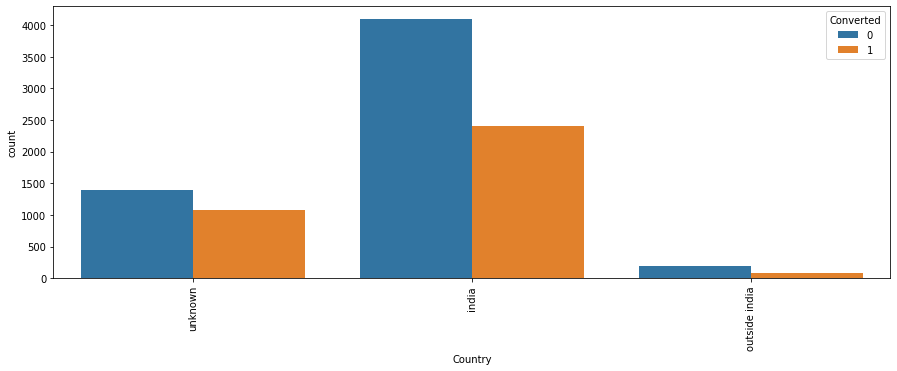

In [17]:
#visualising count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Country'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [18]:
df["What is your current occupation"].value_counts(normalize=True)

unemployed              0.854962
working professional    0.107786
student                 0.032061
other                   0.002443
housewife               0.001527
businessman             0.001221
Name: What is your current occupation, dtype: float64

In [19]:
df["What is your current occupation"] = df["What is your current occupation"].fillna("unknown")
df["What is your current occupation"].value_counts(normalize=True)

unemployed              0.606061
unknown                 0.291126
working professional    0.076407
student                 0.022727
other                   0.001732
housewife               0.001082
businessman             0.000866
Name: What is your current occupation, dtype: float64

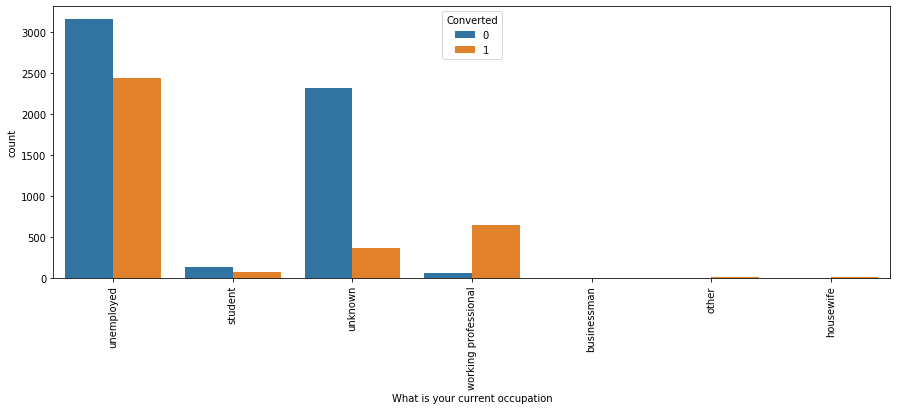

In [20]:
#visualising count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df["What is your current occupation"], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [21]:
df["What matters most to you in choosing a course"].value_counts(normalize=True)

better career prospects      0.999541
flexibility & convenience    0.000306
other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [22]:
# We can drop "What matters most to you in choosing a course"   over 99.9% of people who did respond answered the same way  
df.drop(["What matters most to you in choosing a course"],  axis= 1, inplace=True)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,Last Notable Activity
0,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,unknown,unemployed,no,no,no,no,no,no,no,no,no,no,no,modified
1,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,unemployed,no,no,no,no,no,no,no,no,no,no,no,email opened
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,student,no,no,no,no,no,no,no,no,no,no,yes,email opened
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,unemployed,no,no,no,no,no,no,no,no,no,no,no,modified
4,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,unemployed,no,no,no,no,no,no,no,no,no,no,no,modified


In [23]:
# Checking if there are columns with only one unique value 
df.nunique()

Lead Number                               9240
Lead Origin                                  5
Lead Source                                 20
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
Country                                      3
What is your current occupation              7
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Update me on Supply Chain Content            1
Get updates o

In [24]:
# Dropping  unique valued = 1 columns
df.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content",
              "Get updates on DM Content"],axis=1, inplace=True)

In [25]:
df.shape

(9240, 20)

In [26]:
# Rechecking the percentage of missing values
pct_null= round(100*df.isnull().sum()  / len(df), 2)   
print(pct_null)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64


In [27]:
df1 = df.dropna(how='any',axis=0) 
df1.shape

(9074, 20)

**The difference between df and df1 is less than 2% so will have no meaningful effect on the models, so we can proceed with df1** 

In [28]:
# checking all null values have been removed 
pct_null= round(100*df1.isnull().sum()  / len(df1), 2)   
print(pct_null)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


From the above dataframe we can see that there are no null values in our dataset

In [29]:
# After removing the null values once again rechecking the columns with one value only
df1.nunique()

Lead Number                               9074
Lead Origin                                  4
Lead Source                                 20
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
Country                                      3
What is your current occupation              7
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [30]:
# Reachecking the new dataframe df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Do Not Call                             9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Country                                 9074 non-null   obje

### Data Preparation

In [31]:
# Extracting all the object/Categorical types of columns
object_col = df1.select_dtypes(include="object").columns.to_list()

# Printing all the different Categorical columns with their values
for col in object_col:
    print(df1[col].value_counts())
    print("----------------------------------------------------")

landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
live chat               2
social media            2
press_release           2
welearnblog_home        1
nc_edm                  1
pay per click ads       1
blog                    1
welearn                 1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64
----------------------------------------------------
no     8358
yes     716
Name: Do Not Email, dtype: int64
----------------------------------------------------
no     9072
yes       2
Name: Do Not Call, dtype: int64
----------------

Similarly after examining the "Lead Source" categorical column there are very few Lead Source values of click2call , live chat , press_release, social media, youtubechannel, testone, welearnblog_home, blog , pay per click ads , nc_edm , welearn.

Hence Converting all these values as a single value called "Others".

In [32]:
# Creating a list of less encountered values in the Lead Source column.
element_list = ["click2call" , "live chat" , "press_release", "social media", 
                "youtubechannel", "testone", "welearnblog_home", "blog" , "pay per click ads" , "nc_edm", "welearn"]

# Creating a function to convert all the values in the above list a "others" value.
def others(x):
    i = "Others"
    for element in element_list:
         if x == element:
            return i
            break
    return x

df1['Lead Source'] = df.apply(lambda x: others(x['Lead Source']), axis = 1)
df1['Lead Source'].value_counts()

google              2873
direct traffic      2543
olark chat          1753
organic search      1154
reference            443
welingak website     129
referral sites       125
facebook              31
Others                17
bing                   6
Name: Lead Source, dtype: int64

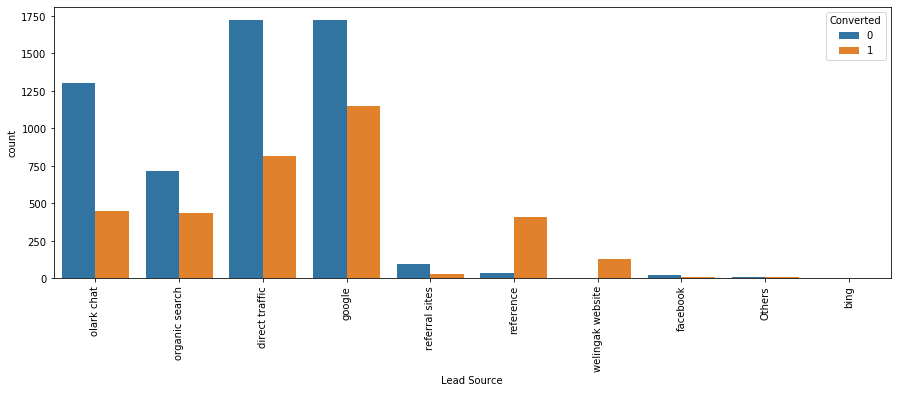

In [33]:
#visualising count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df1["Lead Source"], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Doing the same analysis as the above for the "Last Activity" column.

Here also we have "email marked spam","email received","approached upfront","view in browser link clicked",

"resubscribed to emails" , "visited booth in tradeshow" .

In [34]:
# Creating a list of less encountered values in the Last Activity column.
element_list = ["email marked spam","email received","approached upfront","view in browser link clicked",
                "resubscribed to emails" , "visited booth in tradeshow", "unreachable", "unsubscribed",
                "had a phone conversation" ]

# Creating a function to convert all the values in the above list a "Other_Activity" value.
def Other_Activity(x):
    i = "Other_Activity"
    for element in element_list:
         if x == element:
            return i
            break
    return x

df1['Last Activity'] = df.apply(lambda x: Other_Activity(x['Last Activity']), axis = 1)
df1['Last Activity'].value_counts()

email opened                 3432
sms sent                     2716
olark chat conversation       972
page visited on website       640
converted to lead             428
email bounced                 312
email link clicked            267
Other_Activity                191
form submitted on website     116
Name: Last Activity, dtype: int64

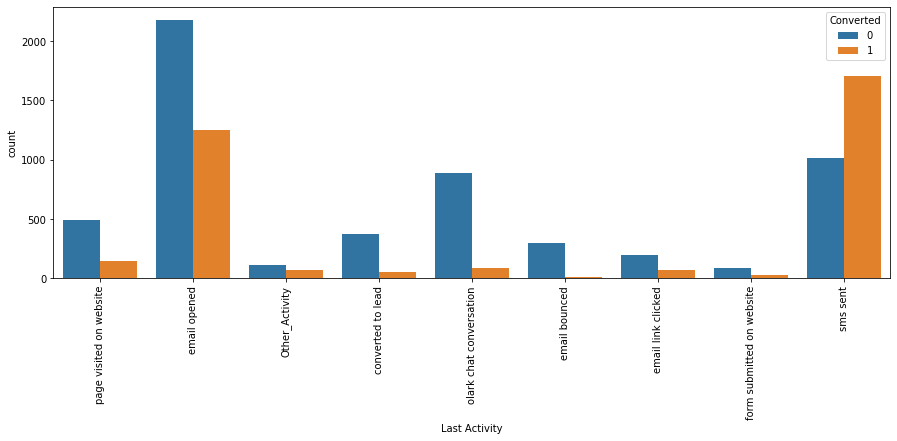

In [35]:
#visualising count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df1["Last Activity"], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Doing the same analysis as the above for the "Last Notable Activity" column.

Here also we have "email marked spam","email received","approached upfront","view in browser link clicked",

"form submitted on website", "resubscribed to emails" 

In [36]:
# Creating a list of less encountered values in the Last Notable Activity.
element_list = ["email marked spam","email received","approached upfront","view in browser link clicked",
               "form submitted on website", "resubscribed to emails","email bounced", "unsubscribed","unreachable",
               "had a phone conversation"]

# Creating a function to convert all the values in the above list a "Other_Notable_Activity" value.
def Other_Notable_Activity(x):
    i = "Other_Notable_Activity"
    for element in element_list:
         if x == element:
            return i
            break
    return x

df1['Last Notable Activity'] = df.apply(lambda x: Other_Notable_Activity(x['Last Notable Activity']), axis = 1)
df1['Last Notable Activity'].value_counts()

modified                   3267
email opened               2823
sms sent                   2152
page visited on website     318
olark chat conversation     183
email link clicked          173
Other_Notable_Activity      158
Name: Last Notable Activity, dtype: int64

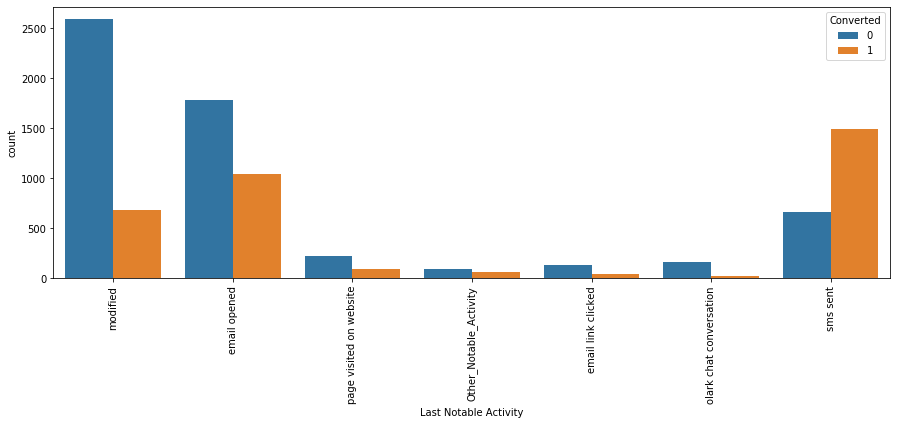

In [37]:
#visualising count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df1["Last Notable Activity"], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Also After Examining the Categorical variables and their variables values we can see that for 

"Newspaper Article", "X Education Forums",  "Newspaper", "Digital Advertisement", "Through Recommendations"

The above variables has most of their values as No which Indicating whether the customer 

had not seen the ad in any of the listed items in "Newspaper Article", "X Education Forums",  "Newspaper", "Digital Advertisement",

"Through Recommendations" in more than 99% of the case hence these variables are not helpful in our Analysis hence removing the above columns

In [38]:
# Hence dropping the above columns
df1.drop(["Newspaper Article", "X Education Forums",  "Newspaper", 
         "Digital Advertisement", "Through Recommendations"],axis=1, inplace=True)

In [39]:
#  From the above we can see that there are some columns having "yes", "no" values converting them into 1 and 0
binary_col = ["Do Not Email", "Do Not Call", "Search", 
              "A free copy of Mastering The Interview" ] 

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df1[binary_col] = df1[binary_col].apply(binary_map)

In [40]:
# Checking the extracted dataframe
df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,A free copy of Mastering The Interview,Last Notable Activity
0,660737,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,unknown,unemployed,0,0,modified
1,660728,api,organic search,0,0,0,5.0,674,2.5,email opened,india,unemployed,0,0,email opened
2,660727,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,india,student,0,1,email opened
3,660719,landing page submission,direct traffic,0,0,0,1.0,305,1.0,Other_Activity,india,unemployed,0,0,modified
4,660681,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,india,unemployed,0,0,modified


In [41]:
# Once again viewing all the unique values of the categorical variables
# Extracting all the object/Categorical types of columns
object_col = df1.select_dtypes(include="object").columns.to_list()

# Printing all the different Categorical columns with their values
for col in object_col:
    print(df1[col].value_counts())
    print("----------------------------------------------------")

landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------
google              2873
direct traffic      2543
olark chat          1753
organic search      1154
reference            443
welingak website     129
referral sites       125
facebook              31
Others                17
bing                   6
Name: Lead Source, dtype: int64
----------------------------------------------------
email opened                 3432
sms sent                     2716
olark chat conversation       972
page visited on website       640
converted to lead             428
email bounced                 312
email link clicked            267
Other_Activity                191
form submitted on website     116
Name: Last Activity, dtype: int64
----------------------------------------------------
india            6491
unknown          2301
outside india  

In [42]:
### For the Remaining Categorical variables creating dummy variables using One hot encoding

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
                                'What is your current occupation', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df1, dummy1], axis=1)
df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Country_outside india,Country_unknown,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_unknown,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,660737,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,unknown,unemployed,0,0,modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,660728,api,organic search,0,0,0,5.0,674,2.5,email opened,india,unemployed,0,0,email opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,660727,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,india,student,0,1,email opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,660719,landing page submission,direct traffic,0,0,0,1.0,305,1.0,Other_Activity,india,unemployed,0,0,modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,660681,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,india,unemployed,0,0,modified,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [43]:
# Now dropping the original columns from which the dummy columns were made
df1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
        'What is your current occupation', 'Last Notable Activity'], inplace=True, axis=1)
df1.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Country_outside india,Country_unknown,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_unknown,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9074 non-null   int64  
 1   Do Not Email                                          9074 non-null   int64  
 2   Do Not Call                                           9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Search                                                9074 non-null   int64  
 8   A free copy of Mastering The Interview                9074

### Checking the Outliers

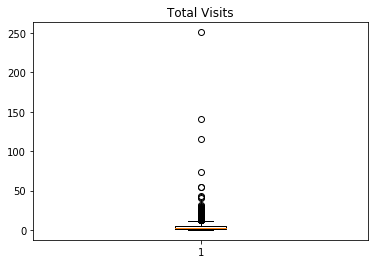

In [45]:
plt.boxplot(x='TotalVisits', data=df1)
plt.title("Total Visits")
plt.show()

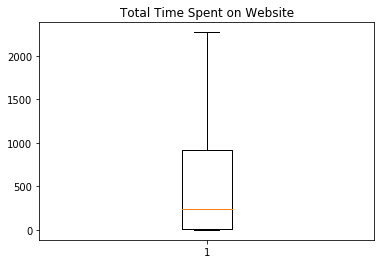

In [46]:
plt.boxplot(x='Total Time Spent on Website', data=df1)
plt.title("Total Time Spent on Website")
plt.show()

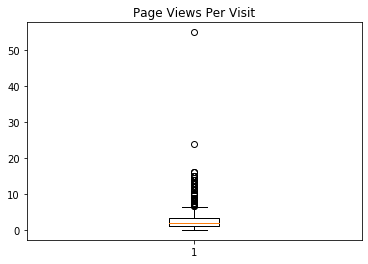

In [47]:
plt.boxplot(x='Page Views Per Visit', data=df1,)
plt.title("Page Views Per Visit")
plt.show()

From the above analysis there does not seem to be any domain specific outliers that effect the dataset

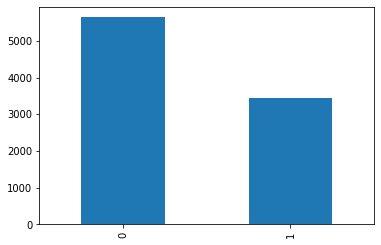

In [48]:
# Cheking if the dependent variable is balanced or not.
df1["Converted"].value_counts().plot.bar()
plt.show()

It seems that dependent variable is balanced with both negative and positive outcomes it approximately balanced values

### Looking at the co-relation

In [49]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

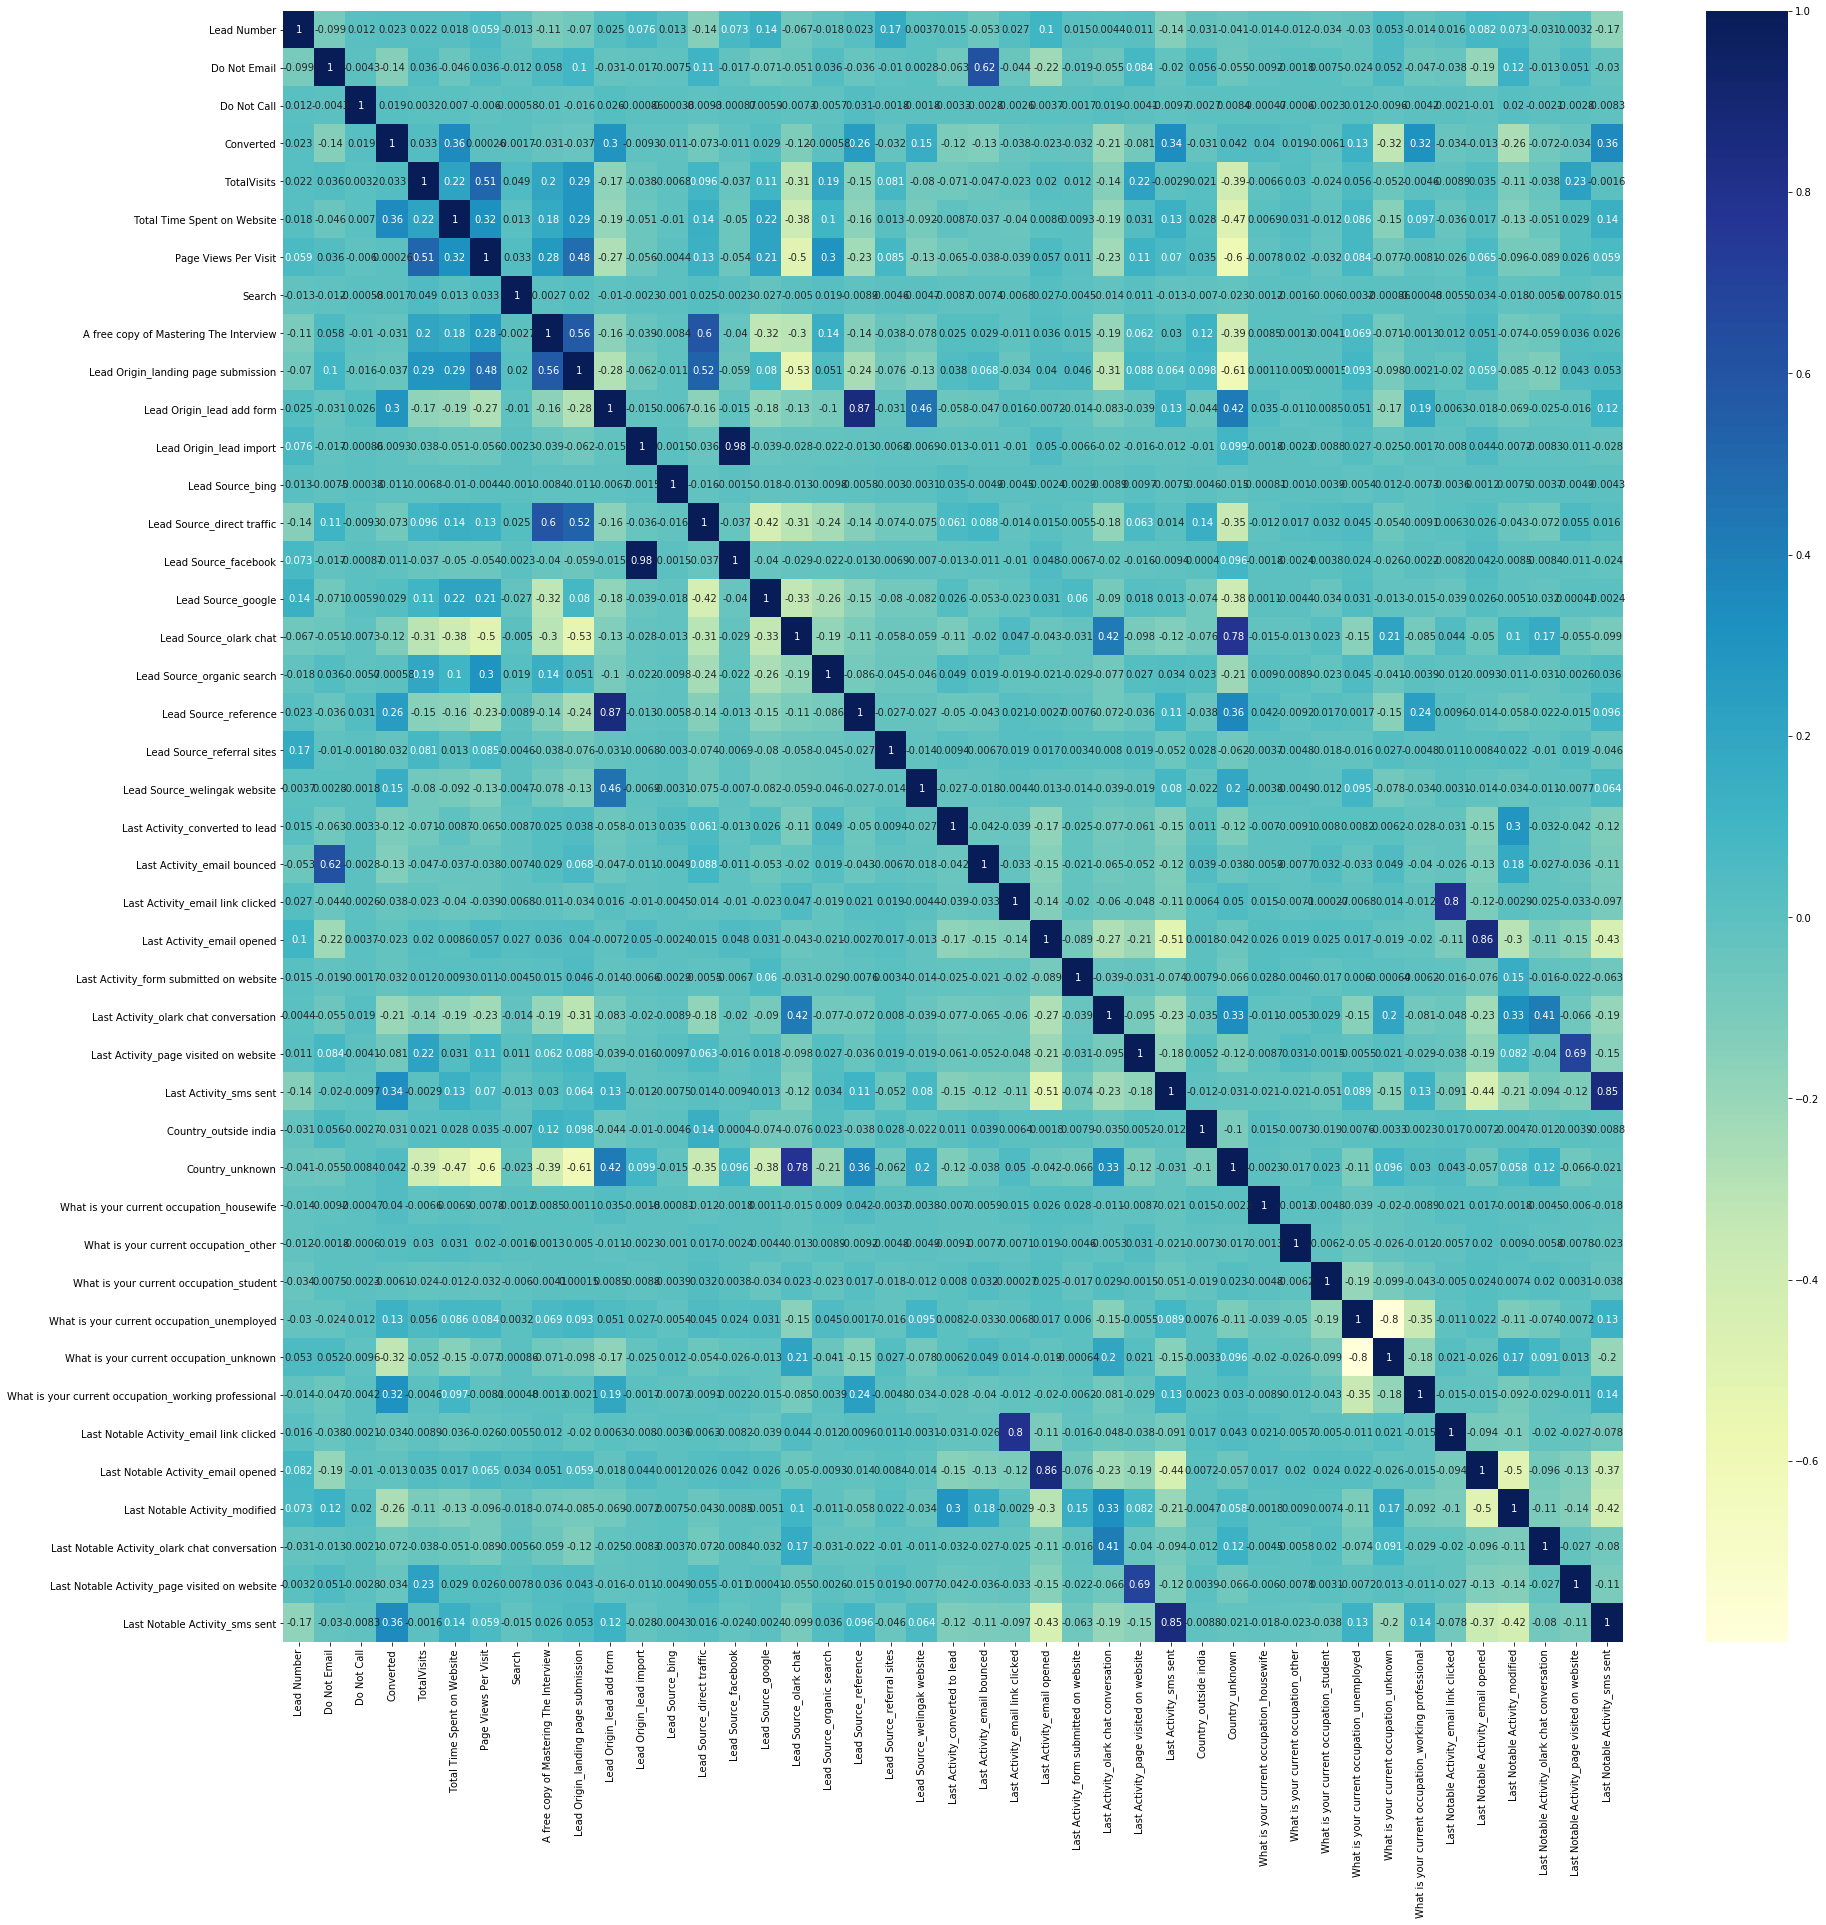

In [50]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(df1.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9074 non-null   int64  
 1   Do Not Email                                          9074 non-null   int64  
 2   Do Not Call                                           9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Search                                                9074 non-null   int64  
 8   A free copy of Mastering The Interview                9074

In [52]:
# There is is high correlation between some items, dropping any correlation greater than 0.8 

df1.drop(['Lead Origin_lead import', 'Last Notable Activity_sms sent', 'Last Notable Activity_email opened',
         'Last Notable Activity_email link clicked', 'Lead Origin_lead add form'], inplace=True, axis=1)


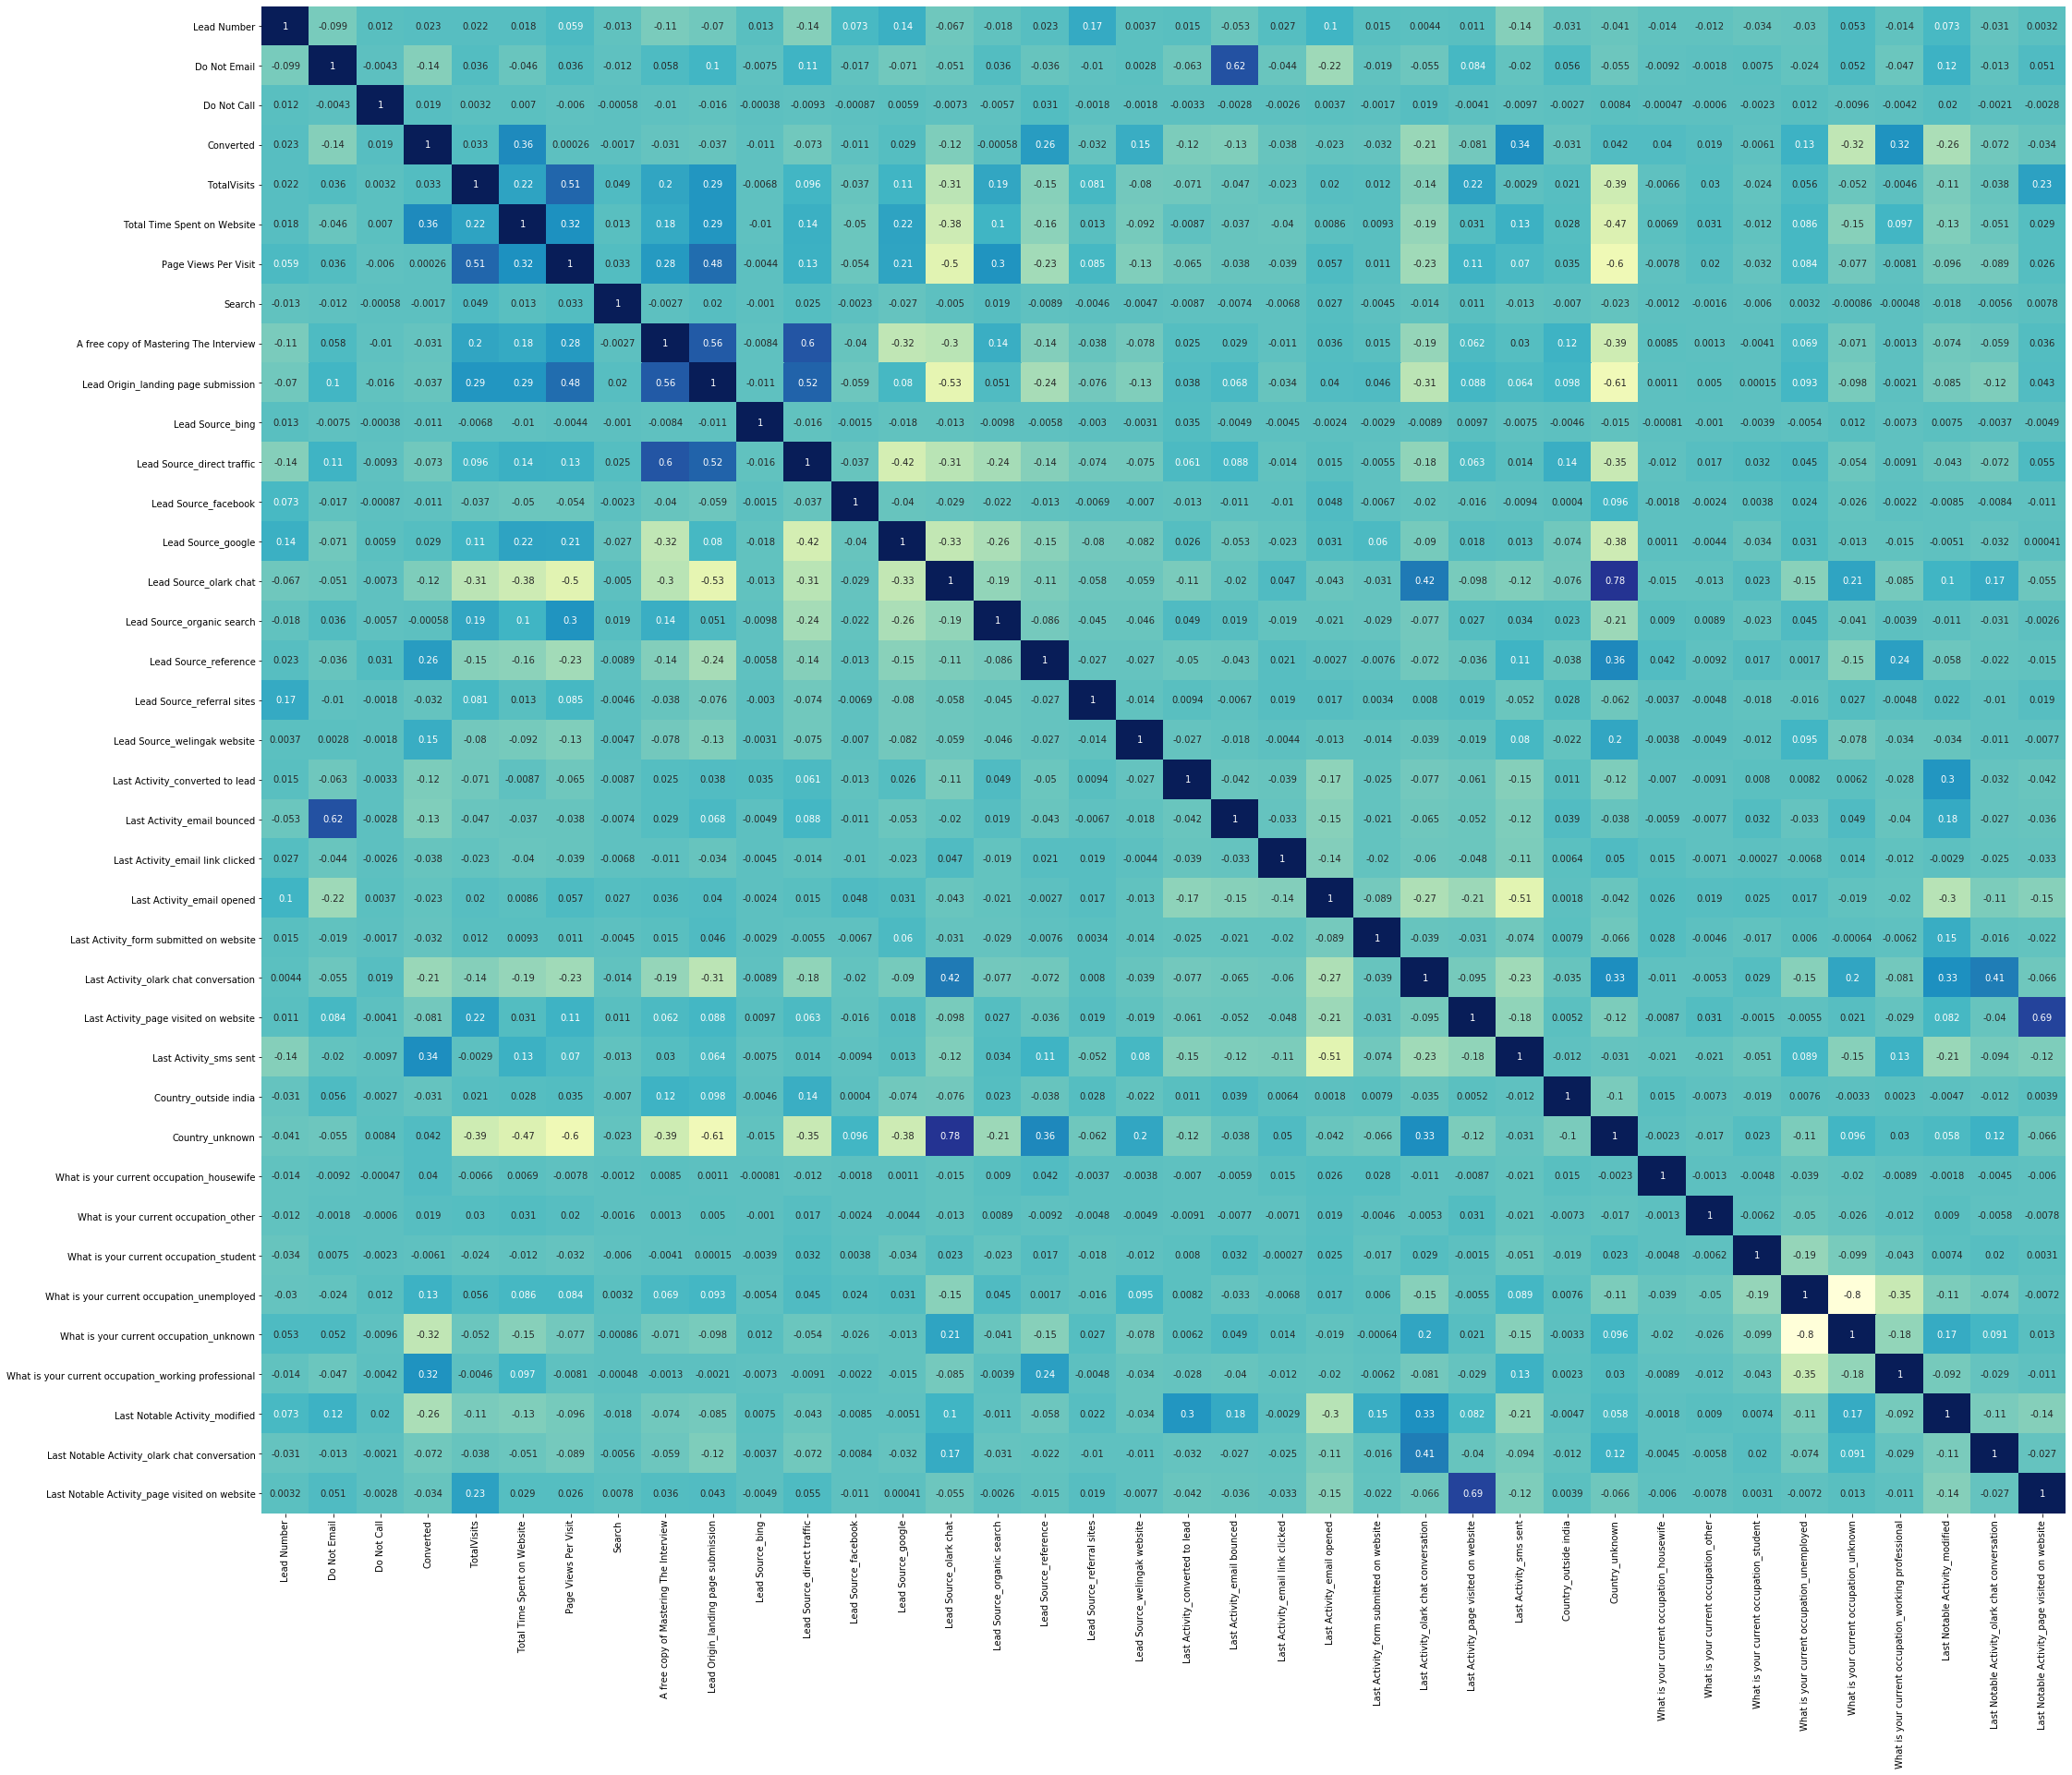

In [53]:
# rechecking the correlation matrix 
plt.figure(figsize = (35,30))        # Size of the figure
sns.heatmap(df1.corr(), cmap="YlGnBu", annot = True, cbar=False,)
plt.show()

### Train-test split

In [54]:
df1.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Country_outside india,Country_unknown,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_unknown,What is your current occupation_working professional,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [55]:
# importing the libraries for the train_test_split
from sklearn.model_selection import train_test_split

In [56]:
# Putting feature variable to X
X = df1.drop(['Converted'], axis=1)

X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Country_outside india,Country_unknown,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_unknown,What is your current occupation_working professional,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,660681,0,0,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [57]:
# Putting response variable to y
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Extracting the lead number and saving it in a series
train_lead_number = X_train["Lead Number"]

test_lead_number = X_test["Lead Number"]

# Dropping the lead Number columns as it is not needed to make any prediction
X_test.drop(['Lead Number'], axis=1, inplace=True)
X_train.drop(['Lead Number'], axis=1, inplace=True)

### Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Country_outside india,Country_unknown,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_unknown,What is your current occupation_working professional,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3009,0,0,-0.284595,-0.160255,-0.179666,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [61]:
### Checking the Lead conversion Rate
converted = (sum(df1['Converted'])/len(df1['Converted'].index))*100
converted

37.85541106458012

#### Education X currently convert approx 38 percentage of leads 

### Model Building

In [62]:
import statsmodels.api as sm

## Model 1

In [63]:
# Logistic regression model
# Ckecking the 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2509.3
Date:                Mon, 07 Dec 2020   Deviance:                       5018.5
Time:                        10:23:53   Pearson chi2:                 6.16e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.7911      1.252      2.230      0.026       0.338       5.244
Do Not Email                                            -1.5961      0.207     -7.710      0.000      -2.002      -1.190
Do Not Call                                             22.1322   3.33e+04      0.001      0.999   -6.53e+04    6.53e+04
TotalVisits                                              0.2032      0.050      4.029      0.000       0.104       0.302
Total Time Spent on Website                              1.1523      0.042     27.341      0.000       1.070       1.235
Page Views Per Visit                                    -0.1110      0.052     -2.132      0.033      -0.213      -0.009
Search                                                  -0.0489      0.861     -0.057      0.955      -1.736       1.638
A free copy of Mastering The Interview                  -0.0044      0.109     -0.040      0.968      -0.219       0.210
Lead Origin_landing page submission                     -0.2419      0.108     -2.249      0.025      -0.453      -0.031
Lead Source_bing                                        -0.5784      1.555     -0.372      0.710      -3.626       2.470
Lead Source_direct traffic                              -1.4037      0.614     -2.287      0.022      -2.607      -0.201
Lead Source_facebook                                    -0.8077      0.771     -1.048      0.295      -2.319       0.704
Lead Source_google                                      -1.0576      0.611     -1.731      0.083      -2.255       0.140
Lead Source_olark chat                                  -0.4565      0.628     -0.727      0.467      -1.688       0.775
Lead Source_organic search                              -1.3502      0.617     -2.187      0.029      -2.560      -0.140
Lead Source_reference                                    1.7447      0.663      2.630      0.009       0.444       3.045
Lead Source_referral sites                              -1.5209      0.700     -2.173      0.030      -2.892      -0.149
Lead Source_welingak website                             3.7310      0.956      3.901      0.000       1.856       5.606
Last Activity_converted to lead                         -1.7837      0.316     -5.637      0.000      -2.404      -1.164
Last Activity_email bounced                             -1.4890      0.454     -3.278      0.001      -2.379      -0.599
Last Activity_email link clicked                        -1.4326      0.305     -4.692      0.000      -2.031      -0.834
Last Activity_email opened                              -1.0906      0.230     -4.751      0.000      -1.541      -0.641
Last Activity_form submitted on website                 -1

#### Feature Selection using RFE

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [65]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [66]:
# Cheking the selected variables and their rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Search', False, 16),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_landing page submission', False, 10),
 ('Lead Source_bing', False, 13),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 7),
 ('Lead Source_google', False, 3),
 ('Lead Source_olark chat', False, 9),
 ('Lead Source_organic search', False, 2),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_welingak website', True, 1),
 ('Last Activity_converted to lead', True, 1),
 ('Last Activity_email bounced', True, 1),
 ('Last Activity_email link clicked', True, 1),
 ('Last Activity_email opened', True, 1),
 ('Last Activity_form submitted on website', True, 1),
 ('Last Activity_olark chat conversation', True, 1),
 ('Last Activity_page visited on website', True, 1),
 ('Last

In [67]:
col = X_train.columns[rfe.support_]

In [68]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'A free copy of Mastering The Interview',
       'Lead Origin_landing page submission', 'Lead Source_bing',
       'Lead Source_facebook', 'Lead Source_google', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Last Activity_sms sent',
       'Country_outside india', 'What is your current occupation_other',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

## Model 2

In [69]:
# Running logistic Regression with selected variables from RFE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.3
Date:                Mon, 07 Dec 2020   Deviance:                       5068.5
Time:                        10:23:54   Pearson chi2:                 6.15e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4294      0.620      2.306      0.021       0.214       2.645
Do Not Email                                            -1.5978      0.201     -7.930      0.000      -1.993      -1.203
Total Time Spent on Website                              1.1401      0.042     27.393      0.000       1.059       1.222
Lead Source_direct traffic                              -0.3781      0.083     -4.533      0.000      -0.542      -0.215
Lead Source_reference                                    2.3078      0.236      9.799      0.000       1.846       2.769
Lead Source_referral sites                              -0.3308      0.355     -0.933      0.351      -1.026       0.364
Lead Source_welingak website                             4.2533      0.727      5.848      0.000       2.828       5.679
Last Activity_converted to lead                         -1.9319      0.236     -8.176      0.000      -2.395      -1.469
Last Activity_email bounced                             -1.5985      0.415     -3.852      0.000      -2.412      -0.785
Last Activity_email link clicked                        -1.5010      0.219     -6.867      0.000      -1.929      -1.073
Last Activity_email opened                              -1.1525      0.081    -14.279      0.000      -1.311      -0.994
Last Activity_form submitted on website                 -1.1321      0.348     -3.253      0.001      -1.814      -0.450
Last Activity_olark chat conversation                   -2.1622      0.175    -12.355      0.000      -2.505      -1.819
Last Activity_page visited on website                   -1.3544      0.155     -8.734      0.000      -1.658      -1.050
Country_unknown                                          1.2469      0.110     11.317      0.000       1.031       1.463
What is your current occupation_housewife               21.5292    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
What is your current occupation_student                 -0.8954      0.653     -1.371      0.170      -2.175       0.384
What is your current occupation_unemployed              -0.9990      0.616     -1.623      0.105      -2.205       0.207
What is your current occupation_unknown                 -2.2231      0.619     -3.590      0.000      -3.437      -1.009
What is your current occupation_working professional     1.4593      0.641      2.276      0.023       0.203       2.716
Last Notable Activity_modified                          -0.7347      0.089     -8.222      0.000      -0.910      -0.560
========================================================================================================================
"""

# Testing the Model with 20 Variables

In [70]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.075369
1012    0.213953
9226    0.482382
4750    0.668584
7987    0.834507
1281    0.813909
2880    0.049689
4971    0.930926
7536    0.883319
1248    0.807823
dtype: float64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07536894, 0.21395286, 0.48238232, 0.66858369, 0.83450742,
       0.81390936, 0.04968892, 0.93092607, 0.88331928, 0.80782342])

In [72]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number
0,0,0.075369,3009
1,0,0.213953,1012
2,0,0.482382,9226
3,1,0.668584,4750
4,1,0.834507,7987


In [73]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [74]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number,predicted
0,0,0.075369,3009,0
1,0,0.213953,1012,0
2,0,0.482382,9226,0
3,1,0.668584,4750,1
4,1,0.834507,7987,1


In [75]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3487  418]
 [ 736 1710]]


In [76]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8182963312864115


## Reducing the Variables

### Cheking for VIF

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_unemployed,3.23
13,Country_unknown,2.58
17,What is your current occupation_unknown,2.48
19,Last Notable Activity_modified,2.29
9,Last Activity_email opened,2.26
0,Do Not Email,1.91
11,Last Activity_olark chat conversation,1.84
7,Last Activity_email bounced,1.81
2,Lead Source_direct traffic,1.63
3,Lead Source_reference,1.45


### To todd- From here we just have to remove variables having more less p-values and high vif one by one and checking the result again and again

In [79]:
X_train_sm.drop('What is your current occupation_housewife', axis = 1, inplace = True)


## Model 3

In [80]:
# Refit the model with the new set of features
logm3 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.1
Date:                Mon, 07 Dec 2020   Deviance:                       5072.1
Time:                        10:23:54   Pearson chi2:                 6.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8891      0.559      3.381      0.001       0.794       2.984
Do Not Email                                            -1.6014      0.202     -7.940      0.000      -1.997      -1.206
Total Time Spent on Website                              1.1389      0.042     27.388      0.000       1.057       1.220
Lead Source_direct traffic                              -0.3792      0.083     -4.549      0.000      -0.543      -0.216
Lead Source_reference                                    2.3212      0.235      9.867      0.000       1.860       2.782
Lead Source_referral sites                              -0.3304      0.355     -0.932      0.351      -1.025       0.364
Lead Source_welingak website                             4.2557      0.727      5.851      0.000       2.830       5.681
Last Activity_converted to lead                         -1.9301      0.236     -8.169      0.000      -2.393      -1.467
Last Activity_email bounced                             -1.5937      0.415     -3.840      0.000      -2.407      -0.780
Last Activity_email link clicked                        -1.4986      0.218     -6.864      0.000      -1.927      -1.071
Last Activity_email opened                              -1.1509      0.081    -14.261      0.000      -1.309      -0.993
Last Activity_form submitted on website                 -1.1440      0.348     -3.283      0.001      -1.827      -0.461
Last Activity_olark chat conversation                   -2.1625      0.175    -12.351      0.000      -2.506      -1.819
Last Activity_page visited on website                   -1.3619      0.155     -8.779      0.000      -1.666      -1.058
Country_unknown                                          1.2425      0.110     11.289      0.000       1.027       1.458
What is your current occupation_student                 -1.3541      0.595     -2.274      0.023      -2.521      -0.187
What is your current occupation_unemployed              -1.4573      0.554     -2.630      0.009      -2.544      -0.371
What is your current occupation_unknown                 -2.6806      0.559     -4.798      0.000      -3.776      -1.586
What is your current occupation_working professional     1.0008      0.582      1.718      0.086      -0.141       2.142
Last Notable Activity_modified                          -0.7365      0.089     -8.243      0.000      -0.912      -0.561
========================================================================================================================
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,283.84
16,What is your current occupation_unemployed,66.74
17,What is your current occupation_unknown,58.36
18,What is your current occupation_working profes...,20.40
15,What is your current occupation_student,7.01
14,Country_unknown,1.93
1,Do Not Email,1.76
8,Last Activity_email bounced,1.75
12,Last Activity_olark chat conversation,1.65
19,Last Notable Activity_modified,1.47


In [82]:
X_train_sm.drop('Lead Source_referral sites', axis = 1, inplace = True)

## Model 4

In [83]:
# Refit the model with the new set of features
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.5
Date:                Mon, 07 Dec 2020   Deviance:                       5073.0
Time:                        10:23:54   Pearson chi2:                 6.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8893      0.559      3.380      0.001       0.794       2.985
Do Not Email                                            -1.6018      0.202     -7.942      0.000      -1.997      -1.207
Total Time Spent on Website                              1.1397      0.042     27.410      0.000       1.058       1.221
Lead Source_direct traffic                              -0.3731      0.083     -4.488      0.000      -0.536      -0.210
Lead Source_reference                                    2.3219      0.235      9.869      0.000       1.861       2.783
Lead Source_welingak website                             4.2563      0.727      5.852      0.000       2.831       5.682
Last Activity_converted to lead                         -1.9281      0.236     -8.166      0.000      -2.391      -1.465
Last Activity_email bounced                             -1.5913      0.415     -3.834      0.000      -2.405      -0.778
Last Activity_email link clicked                        -1.5023      0.218     -6.887      0.000      -1.930      -1.075
Last Activity_email opened                              -1.1516      0.081    -14.272      0.000      -1.310      -0.993
Last Activity_form submitted on website                 -1.1429      0.348     -3.282      0.001      -1.825      -0.460
Last Activity_olark chat conversation                   -2.1677      0.175    -12.376      0.000      -2.511      -1.824
Last Activity_page visited on website                   -1.3653      0.155     -8.804      0.000      -1.669      -1.061
Country_unknown                                          1.2497      0.110     11.376      0.000       1.034       1.465
What is your current occupation_student                 -1.3568      0.596     -2.278      0.023      -2.524      -0.189
What is your current occupation_unemployed              -1.4627      0.554     -2.638      0.008      -2.549      -0.376
What is your current occupation_unknown                 -2.6867      0.559     -4.807      0.000      -3.782      -1.591
What is your current occupation_working professional     0.9932      0.583      1.705      0.088      -0.149       2.135
Last Notable Activity_modified                          -0.7397      0.089     -8.285      0.000      -0.915      -0.565
========================================================================================================================
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,283.84
15,What is your current occupation_unemployed,66.73
16,What is your current occupation_unknown,58.36
17,What is your current occupation_working profes...,20.40
14,What is your current occupation_student,7.01
13,Country_unknown,1.91
1,Do Not Email,1.76
7,Last Activity_email bounced,1.75
11,Last Activity_olark chat conversation,1.65
18,Last Notable Activity_modified,1.47


In [85]:
X_train_sm.drop('What is your current occupation_unemployed', axis = 1, inplace = True)

## Model 5

In [86]:
# Refit the model with the new set of features
logm5 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res_new = logm5.fit()
res_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.3
Date:                Mon, 07 Dec 2020   Deviance:                       5080.5
Time:                        10:23:54   Pearson chi2:                 6.18e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4275      0.074      5.790      0.000       0.283       0.572
Do Not Email                                            -1.5932      0.202     -7.906      0.000      -1.988      -1.198
Total Time Spent on Website                              1.1405      0.042     27.456      0.000       1.059       1.222
Lead Source_direct traffic                              -0.3728      0.083     -4.489      0.000      -0.536      -0.210
Lead Source_reference                                    2.3523      0.235      9.992      0.000       1.891       2.814
Lead Source_welingak website                             4.2520      0.727      5.846      0.000       2.826       5.678
Last Activity_converted to lead                         -1.9324      0.236     -8.186      0.000      -2.395      -1.470
Last Activity_email bounced                             -1.5995      0.415     -3.855      0.000      -2.413      -0.786
Last Activity_email link clicked                        -1.4968      0.218     -6.875      0.000      -1.924      -1.070
Last Activity_email opened                              -1.1415      0.081    -14.173      0.000      -1.299      -0.984
Last Activity_form submitted on website                 -1.1126      0.348     -3.200      0.001      -1.794      -0.431
Last Activity_olark chat conversation                   -2.1599      0.175    -12.340      0.000      -2.503      -1.817
Last Activity_page visited on website                   -1.3450      0.155     -8.687      0.000      -1.648      -1.042
Country_unknown                                          1.2450      0.110     11.347      0.000       1.030       1.460
What is your current occupation_student                  0.0955      0.226      0.422      0.673      -0.348       0.539
What is your current occupation_unknown                 -1.2321      0.089    -13.815      0.000      -1.407      -1.057
What is your current occupation_working professional     2.4451      0.190     12.842      0.000       2.072       2.818
Last Notable Activity_modified                          -0.7343      0.089     -8.239      0.000      -0.909      -0.560
========================================================================================================================
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.36
13,Country_unknown,1.91
1,Do Not Email,1.76
7,Last Activity_email bounced,1.75
11,Last Activity_olark chat conversation,1.65
17,Last Notable Activity_modified,1.47
9,Last Activity_email opened,1.43
4,Lead Source_reference,1.37
2,Total Time Spent on Website,1.35
6,Last Activity_converted to lead,1.28


In [88]:
X_train_sm.drop('What is your current occupation_student', axis = 1, inplace = True)

## Model 6

In [89]:
# Refit the model with the new set of features
logm6 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res_new = logm6.fit()
res_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.4
Date:                Mon, 07 Dec 2020   Deviance:                       5080.7
Time:                        10:23:55   Pearson chi2:                 6.18e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4288      0.074      5.813      0.000       0.284       0.573
Do Not Email                                            -1.5930      0.202     -7.904      0.000      -1.988      -1.198
Total Time Spent on Website                              1.1406      0.042     27.457      0.000       1.059       1.222
Lead Source_direct traffic                              -0.3717      0.083     -4.478      0.000      -0.534      -0.209
Lead Source_reference                                    2.3525      0.235      9.994      0.000       1.891       2.814
Lead Source_welingak website                             4.2485      0.727      5.842      0.000       2.823       5.674
Last Activity_converted to lead                         -1.9311      0.236     -8.179      0.000      -2.394      -1.468
Last Activity_email bounced                             -1.5965      0.415     -3.848      0.000      -2.410      -0.783
Last Activity_email link clicked                        -1.4950      0.218     -6.866      0.000      -1.922      -1.068
Last Activity_email opened                              -1.1391      0.080    -14.182      0.000      -1.297      -0.982
Last Activity_form submitted on website                 -1.1128      0.348     -3.201      0.001      -1.794      -0.431
Last Activity_olark chat conversation                   -2.1560      0.175    -12.336      0.000      -2.498      -1.813
Last Activity_page visited on website                   -1.3435      0.155     -8.679      0.000      -1.647      -1.040
Country_unknown                                          1.2465      0.110     11.364      0.000       1.031       1.461
What is your current occupation_unknown                 -1.2354      0.089    -13.904      0.000      -1.410      -1.061
What is your current occupation_working professional     2.4418      0.190     12.836      0.000       2.069       2.815
Last Notable Activity_modified                          -0.7350      0.089     -8.247      0.000      -0.910      -0.560
========================================================================================================================
"""

In [90]:
# Calculating the VIF of the features
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.35
13,Country_unknown,1.91
1,Do Not Email,1.76
7,Last Activity_email bounced,1.75
11,Last Activity_olark chat conversation,1.64
16,Last Notable Activity_modified,1.47
9,Last Activity_email opened,1.42
4,Lead Source_reference,1.37
2,Total Time Spent on Website,1.35
6,Last Activity_converted to lead,1.28


In [91]:
# Getting the  predicted values on the train set
y_train_pred = res_new.predict(X_train_sm)
y_train_pred[:10]

3009    0.075847
1012    0.213059
9226    0.481673
4750    0.667304
7987    0.835246
1281    0.813725
2880    0.049695
4971    0.930878
7536    0.885309
1248    0.808642
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07584656, 0.21305901, 0.48167285, 0.66730387, 0.83524555,
       0.81372504, 0.0496955 , 0.93087779, 0.88530938, 0.80864162])

In [93]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [94]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number,predicted
0,0,0.075847,3009,0
1,0,0.213059,1012,0
2,0,0.481673,9226,0
3,1,0.667304,4750,1
4,1,0.835246,7987,1


In [95]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
#y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
#y_train_pred_final['Lead Number'] = y_train.index
#y_train_pred_final.head()

In [96]:
# Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [97]:
# Let's check the dataframe
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number,predicted
0,0,0.075847,3009,0
1,0,0.213059,1012,0
2,0,0.481673,9226,0
3,1,0.667304,4750,1
4,1,0.835246,7987,1


In [98]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3485  420]
 [ 737 1709]]


In [99]:
# check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8178239647299638


**Accuracy of Model 6 is practically the same 81.78% compared to 81.83% of Model 1**

# Checking the other Metrics

In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# The sensitivity of our logistic regression model
TP / float(TP+FN)

0.6986917416189697

In [102]:
# Calculate specificity
TN / float(TN+FP)

0.8924455825864277

In [103]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.10755441741357234


In [104]:
# positive predictive value 
print (TP / float(TP+FP))

0.8027242837012682


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8254381809568925


# Roc Curve

In [106]:
# Creating a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
# Extracting different parameters required for plotting the ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob,
                                         drop_intermediate = False )

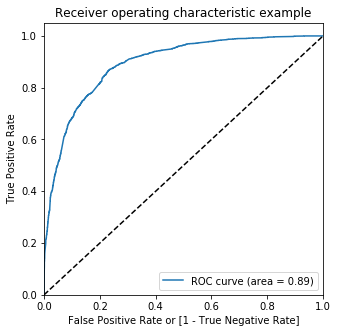

In [108]:
# Plotting the ROC curve
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Finding Optimal Cutoff Point

In [109]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.075847,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.213059,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.481673,9226,0,1,1,1,1,1,0,0,0,0,0
3,1,0.667304,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.835246,7987,1,1,1,1,1,1,1,1,1,1,0


In [110]:
# Creating a dataframe to print the different values of accuracy , sensitiviy , specificity for different threshold values
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.651393  0.972608  0.450192
0.2   0.2  0.759093  0.922731  0.656594
0.3   0.3  0.801764  0.873671  0.756722
0.4   0.4  0.814517  0.775961  0.838668
0.5   0.5  0.817824  0.698692  0.892446
0.6   0.6  0.809636  0.633279  0.920102
0.7   0.7  0.782869  0.525756  0.943918
0.8   0.8  0.761297  0.434178  0.966197
0.9   0.9  0.714533  0.280458  0.986428


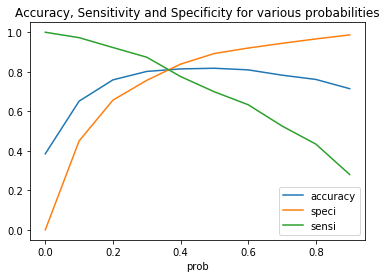

In [111]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi'])
plt.title("Accuracy, Sensitivity and Specificity for various probabilities")
plt.show()

**From the above plot we can see that the optimum cutoff probability is around 0.35**

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.075847,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.213059,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.481673,9226,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.667304,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.835246,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [113]:
# check the accuracy
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8083766336010078

####  The accuracy of our model is above approximately  80% which was required as the ballpark figure by the company

In [114]:
# Creating a Confusion matrix for our logistic Regression model
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3074,  831],
       [ 386, 2060]], dtype=int64)

In [115]:
# Extracting the different elements from our confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### After Checking the accuracy also checking other different evaluation metrics such as
#### Sensitivity, Specificity 

In [116]:
# sensitivity of our logistic regression model
sensitivity =  TP / (TP+FN)
sensitivity

0.8421913327882257

In [117]:
#### The above sensitivity value shows that our logistic Regression model 

In [118]:
# calculating the specificity of our model
specificity = TN / float(TN+FP)
specificity

0.7871959026888604

#### The values of sensitivity is 84% shows that approximately 84% of leads converted to hot lead  were correctly predicted out of the total hot leads converted

#### Similary The value of specificity of 78% percantage shows that 78% of leads that were not converted to hot leads were correctly predicted out of the total leads that were not converted

#### So in shorts our model on train data gives an 
#### accuracy = 80%, sensitivity = 84%, specificity = 78%

### Validating our Logistic Regression model using the Test dataset

In [119]:
# Applying the Feature scaling to the integer and float variable in the test dataset using the previous scaler object as in train dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Source_bing,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_olark chat,Lead Source_organic search,Lead Source_reference,Lead Source_referral sites,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,Country_outside india,Country_unknown,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_unknown,What is your current occupation_working professional,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3271,0,0,0.102194,-0.600595,0.773206,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1490,0,0,0.295588,1.887326,1.249642,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,0,0,-0.284595,-0.752879,-0.179666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4216,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3830,0,0,0.875771,-0.587751,2.678951,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [120]:
# Extracting the columns used in the training dataset while building the model
col_list = X_train_sm.columns.to_list()
col_list.remove("const")
X_test = X_test[col_list]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_direct traffic,Lead Source_reference,Lead Source_welingak website,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_olark chat conversation,Last Activity_page visited on website,Country_unknown,What is your current occupation_unknown,What is your current occupation_working professional,Last Notable Activity_modified
3271,0,-0.600595,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,1,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4216,0,-0.888650,0,1,0,0,0,0,1,0,0,0,1,0,0,1
3830,0,-0.587751,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [121]:
# Now in this test dataset we can apply our logistic Regression model
X_test_sm = sm.add_constant(X_test)
# Getting the predicted values on the test set
y_test_pred = res_new.predict(X_test_sm)
y_test_pred[:10]

3271    0.067189
1490    0.971040
7936    0.057088
4216    0.757687
3830    0.068113
1800    0.706203
6507    0.421936
4821    0.338857
4223    0.953209
4714    0.212704
dtype: float64

In [122]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [124]:
y_test_df.reset_index(drop=True, inplace=False).head()
# y_test_df.head()

,Converted
0,0
1,1
2,0
3,1
4,0


In [125]:
# Putting lead_number to index
y_test_df['lead_number'] = test_lead_number

In [126]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
y_pred_final.head()

,Converted,lead_number,0
0,0,628652,0.067189
1,1,644500,0.971040
2,0,588935,0.057088
3,1,619437,0.757687
4,0,623381,0.068113


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Hot_lead_Conversion_Prob'})

In [130]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['lead_number','Converted','Hot_lead_Conversion_Prob'], axis=1)

In [131]:
# Let's see the head of y_pred_final
y_pred_final.head()

,lead_number,Converted,Hot_lead_Conversion_Prob
0,628652,0,0.067189
1,644500,1,0.971040
2,588935,0,0.057088
3,619437,1,0.757687
4,623381,0,0.068113


In [132]:
# Using the optimum probablity of 0.35 to convert the Hot_lead_Conversion_Prob to a predicted value
y_pred_final['final_predicted'] = y_pred_final.Hot_lead_Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [133]:
y_pred_final.head()

,lead_number,Converted,Hot_lead_Conversion_Prob,final_predicted
0,628652,0,0.067189,0
1,644500,1,0.971040,1
2,588935,0,0.057088,0
3,619437,1,0.757687,1
4,623381,0,0.068113,0


In [134]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8057289753947852

In [135]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1368,  366],
       [ 163,  826]], dtype=int64)

In [136]:
# Extracting the parameter from the confusion matrix 
TP = confusion_test[1,1] # true positive
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
test_sensitivity =  TP / float(TP+FN)
test_sensitivity

0.8351870576339737

In [138]:
# Let us calculate specificity
test_specificity = TN / float(TN+FP)
test_specificity

0.7889273356401384

### For the test data
#### The values of sensitivity is 83.5% shows that approximately 83.5% of leads converted to hot lead  were correctly predicted out of the total hot leads converted

#### Similary The value of specificity of 78.8% percantage shows that 78.8% of leads that were not converted to hot leads were correctly predicted out of the total leads that were not converted

#### So in short our model on test data gives an 
#### Accuracy = 80.5%, Sensitivity = 83.5%, Specificity = 78.8%

#### So we can validate as all the three values accuracy, specificity, sensitivity the test and train values are almost the same 
#### with an accuracy = 81% , sensitivity = 84% and Specificity = 79% which are  good values for our logistic regression model which 
#### satisfies the ballpark of the target lead conversion rate of around 80% which was given by the CEO of X Education 

In [139]:
y_pred_final.head()

,lead_number,Converted,Hot_lead_Conversion_Prob,final_predicted
0,628652,0,0.067189,0
1,644500,1,0.971040,1
2,588935,0,0.057088,0
3,619437,1,0.757687,1
4,623381,0,0.068113,0


In [145]:
# Creating a score column in final datafame to give each lead in the test dataset a value between 0 to 100 value in according
# to how high is the probability of the lead to get converted into hot lead.
# value 0 mean it has the lowest probabiliy and 100 means the probability is very high
y_pred_final["Score"] = round(y_pred_final.Hot_lead_Conversion_Prob*100, 2)
y_pred_final.head()

,lead_number,Converted,Hot_lead_Conversion_Prob,final_predicted,Score
0,628652,0,0.067189,0,6.72
1,644500,1,0.971040,1,97.10
2,588935,0,0.057088,0,5.71
3,619437,1,0.757687,1,75.77
4,623381,0,0.068113,0,6.81


In [144]:
# viewing a random sample of the dataset
y_pred_final.sample(20)

,lead_number,Converted,Hot_lead_Conversion_Prob,final_predicted,Score
184,591694,1,0.965758,1,96.58
1386,584185,0,0.237912,0,23.79
306,613046,1,0.382861,1,38.29
1712,617259,0,0.659636,1,65.96
1055,633959,1,0.995748,1,99.57
1484,615477,0,0.382861,1,38.29
813,641909,1,0.547413,1,54.74
1736,638694,0,0.195732,0,19.57
2441,588664,0,0.124491,0,12.45
338,636403,0,0.027470,0,2.75
